S11_mag: -17.30837927440555 dB


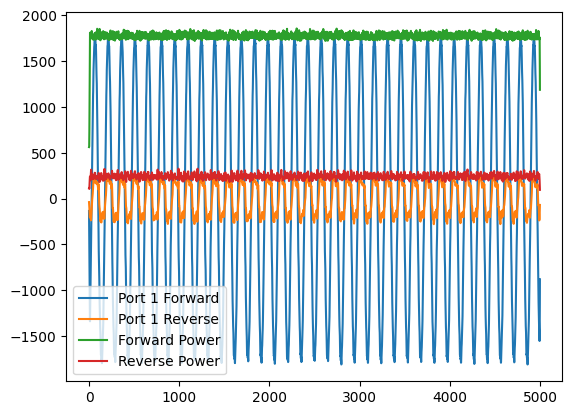

In [17]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

if_bandwidth = 10e3
fir_filter = signal.firwin(15, [1e6 - if_bandwidth / 2, 1e6 + if_bandwidth / 2], fs = 147.456e6, pass_zero = False)

data = np.load("both_ports_open_port1_active_adc_data.npz")

filtered_port1_forward = np.convolve(fir_filter, data["port1_forward"][:5000], mode = "same")
filtered_port1_reverse = np.convolve(fir_filter, data["port1_reverse"][:5000], mode = "same")

forward_power = np.abs(filtered_port1_forward)
reverse_power = np.abs(filtered_port1_reverse)

print(f"S11_mag: {-20 * np.log10(np.mean(forward_power) / np.mean(reverse_power))} dB")

plt.plot(filtered_port1_forward.real, label = "Port 1 Forward")
plt.plot(filtered_port1_reverse.real, label = "Port 1 Reverse")
plt.plot(forward_power, label = "Forward Power")
plt.plot(reverse_power, label = "Reverse Power")
plt.legend()
plt.show()